## Regression problem

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.linear_model import BayesianRidge 
from sklearn.linear_model import ElasticNet 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import explained_variance_score as evs 
from sklearn.metrics import r2_score as r2 

/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Explanatory data analysis

In [2]:
db = pd.read_csv("listings.csv")

In [3]:
db.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,720,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,816,365,41,2018-11-07,0.33,2,279
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,233,30,13,2018-05-04,0.19,1,289
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,761,3,0,NaN,NaN,19,365
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,823,3,0,NaN,NaN,1,88


In [4]:
db.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.372800e+04,2.372800e+04,0.0,23728.000000,23728.000000,23728.000000,23728.000000,23728.000000,11353.000000,23728.000000,23728.000000
mean,2.913711e+07,1.493973e+08,NaN,41.028416,28.982111,484.643248,4.525202,7.870828,0.710177,5.861767,227.709921
std,1.305964e+07,1.155452e+08,NaN,0.045713,0.127503,1973.884093,27.614191,23.229127,0.902913,16.535368,146.607077
min,4.826000e+03,6.603000e+03,NaN,40.813960,28.019010,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,2.101860e+07,3.285440e+07,NaN,41.005120,28.973210,137.000000,1.000000,0.000000,0.130000,1.000000,89.000000
50%,3.398637e+07,1.477727e+08,NaN,41.031850,28.983485,247.000000,1.000000,0.000000,0.330000,2.000000,302.000000
75%,3.965902e+07,2.588145e+08,NaN,41.048530,29.020050,446.000000,3.000000,4.000000,0.950000,5.000000,365.000000
max,4.397093e+07,3.522041e+08,NaN,41.479030,29.907780,76922.000000,1125.000000,345.000000,9.200000,176.000000,365.000000


<AxesSubplot: xlabel='price'>

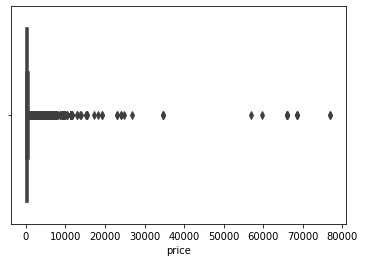

In [5]:
sns.boxplot(x=db["price"])

In [6]:
db = db.drop("neighbourhood_group", axis = 1)
db = db.drop("last_review", axis = 1)
db = db.drop("reviews_per_month", axis = 1)
db

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,Uskudar,41.05650,29.05367,Entire home/apt,720,1,1,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,Besiktas,41.06984,29.04545,Entire home/apt,816,365,41,2,279
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,Beyoglu,41.03254,28.98153,Entire home/apt,233,30,13,1,289
3,28277,Duplex Apartment with Terrace,121607,Alen,Sisli,41.04471,28.98567,Hotel room,761,3,0,19,365
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,Sariyer,41.09048,29.05559,Entire home/apt,823,3,0,1,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23723,43963636,Avcılarda özel oda,297895734,Aykhan,Avcilar,40.97870,28.72668,Private room,171,1,0,2,175
23724,43966333,1+1 LUXURY RESIDENCEIN MASLAK HYGIENE CERTIFIC...,69089629,Metin,Sisli,41.11798,29.00886,Entire home/apt,597,1,0,15,363
23725,43966442,The Rooms In Beyoğlu,286090194,Seyfulla,Beyoglu,41.03839,28.98831,Private room,144,1,0,7,210
23726,43967082,Istanbul dream apartement,288314755,Adil,Esenyurt,41.01065,28.67427,Entire home/apt,603,2,0,1,90


In [7]:
db["price"] = db["price"].mask(db["price"] > 800, None)

In [8]:
db = db.dropna()

In [9]:
db.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,2.154500e+04,2.154500e+04,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000
mean,2.918082e+07,1.503664e+08,41.027134,28.983105,270.645161,4.269993,8.063959,5.172291,223.867904
std,1.297947e+07,1.154122e+08,0.044502,0.123948,179.896709,24.451590,23.456607,14.154423,146.953254
min,4.826000e+03,6.603000e+03,40.813960,28.019010,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2.113656e+07,3.328595e+07,41.004610,28.973310,130.000000,1.000000,0.000000,1.000000,89.000000
50%,3.398269e+07,1.500107e+08,41.031610,28.983680,226.000000,1.000000,0.000000,2.000000,270.000000
75%,3.962846e+07,2.594091e+08,41.047760,29.022170,377.000000,2.000000,4.000000,5.000000,365.000000
max,4.397093e+07,3.522041e+08,41.479030,29.907780,795.000000,1000.000000,345.000000,176.000000,365.000000


<AxesSubplot: xlabel='price'>

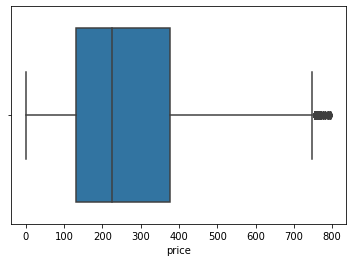

In [10]:
sns.boxplot(x=db["price"])

In [11]:
db = db.reset_index()

In [12]:
db.head()

,index,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,4826,The Place,6603,Kaan,Uskudar,41.05650,29.05367,Entire home/apt,720.0,1,1,1,365
1,2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,Beyoglu,41.03254,28.98153,Entire home/apt,233.0,30,13,1,289
2,3,28277,Duplex Apartment with Terrace,121607,Alen,Sisli,41.04471,28.98567,Hotel room,761.0,3,0,19,365
3,5,29241,"↪ Istanbul, Your second house",125742,Şevki,Beyoglu,41.04844,28.95254,Private room,343.0,3,0,1,364
4,6,30697,nice home in popular area,132137,Nan,Beyoglu,41.03350,28.97626,Private room,768.0,1,1,1,365


## Taksim square coordinates (city center):
### Latitude:	41.036945, Longitude:	28.985832

In [13]:
from shapely.geometry import Point
import geopandas as gpd
from geopy.distance import geodesic

In [14]:
distance_from_the_center = []
city_center = (41.036945, 28.985832)
for i in range (0, len(db["latitude"])):
    apartment = db["latitude"][i],db["longitude"][i]
    dist = geodesic(city_center,apartment).km
    dist = round(dist,3)
    distance_from_the_center.append(dist)
    
db["distance_from_the_center_km"] = distance_from_the_center

In [15]:
db.head()

,index,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_from_the_center_km
0,0,4826,The Place,6603,Kaan,Uskudar,41.05650,29.05367,Entire home/apt,720.0,1,1,1,365,6.103
1,2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,Beyoglu,41.03254,28.98153,Entire home/apt,233.0,30,13,1,289,0.608
2,3,28277,Duplex Apartment with Terrace,121607,Alen,Sisli,41.04471,28.98567,Hotel room,761.0,3,0,19,365,0.862
3,5,29241,"↪ Istanbul, Your second house",125742,Şevki,Beyoglu,41.04844,28.95254,Private room,343.0,3,0,1,364,3.077
4,6,30697,nice home in popular area,132137,Nan,Beyoglu,41.03350,28.97626,Private room,768.0,1,1,1,365,0.891


In [16]:
db = db.drop("host_id", axis = 1)
db.head()

,index,id,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_from_the_center_km
0,0,4826,The Place,Kaan,Uskudar,41.05650,29.05367,Entire home/apt,720.0,1,1,1,365,6.103
1,2,27271,LOVELY APT. IN PERFECT LOCATION,Mutlu,Beyoglu,41.03254,28.98153,Entire home/apt,233.0,30,13,1,289,0.608
2,3,28277,Duplex Apartment with Terrace,Alen,Sisli,41.04471,28.98567,Hotel room,761.0,3,0,19,365,0.862
3,5,29241,"↪ Istanbul, Your second house",Şevki,Beyoglu,41.04844,28.95254,Private room,343.0,3,0,1,364,3.077
4,6,30697,nice home in popular area,Nan,Beyoglu,41.03350,28.97626,Private room,768.0,1,1,1,365,0.891


In [17]:
db['room_type'] = db['room_type'].replace({'Entire home/apt':'Entire'})

In [18]:
db.room_type.value_counts()

Entire          10290
Private room     9816
Hotel room        781
Shared room       658
Name: room_type, dtype: int64

In [19]:
db['room_type'] = db['room_type'].replace({'Private room':'Private'})
db['room_type'] = db['room_type'].replace({'Hotel room':'Hotel'})
db['room_type'] = db['room_type'].replace({'Shared room':'Shared'})

In [20]:
db.room_type.value_counts()

Entire     10290
Private     9816
Hotel        781
Shared       658
Name: room_type, dtype: int64

In [21]:
db.isnull().sum()

index                             0
id                                0
name                              0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
distance_from_the_center_km       0
dtype: int64

In [22]:
db = db.set_index(db['id'])
db = db.drop('index', axis = 1)
db = db.drop('id', axis = 1)

In [23]:
db.head()

,name,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_from_the_center_km
id,,,,,,,,,,,,
4826,The Place,Kaan,Uskudar,41.05650,29.05367,Entire,720.0,1,1,1,365,6.103
27271,LOVELY APT. IN PERFECT LOCATION,Mutlu,Beyoglu,41.03254,28.98153,Entire,233.0,30,13,1,289,0.608
28277,Duplex Apartment with Terrace,Alen,Sisli,41.04471,28.98567,Hotel,761.0,3,0,19,365,0.862
29241,"↪ Istanbul, Your second house",Şevki,Beyoglu,41.04844,28.95254,Private,343.0,3,0,1,364,3.077
30697,nice home in popular area,Nan,Beyoglu,41.03350,28.97626,Private,768.0,1,1,1,365,0.891


<ipython-input-24-4d26c9dd050c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(db.corr() , annot = True , cmap = "YlGnBu")


<AxesSubplot: >

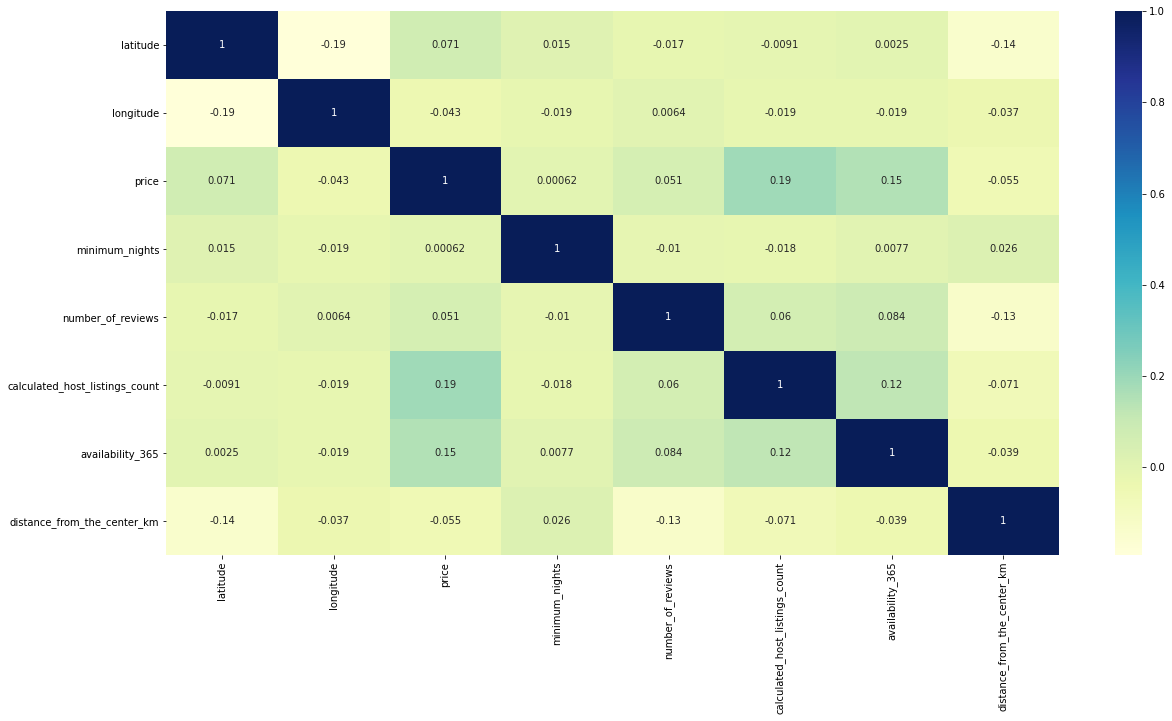

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(db.corr() , annot = True , cmap = "YlGnBu")

In [25]:
db.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_from_the_center_km
count,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000
mean,41.027134,28.983105,270.645161,4.269993,8.063959,5.172291,223.867904,6.975345
std,0.044502,0.123948,179.896709,24.451590,23.456607,14.154423,146.953254,9.253808
min,40.813960,28.019010,0.000000,1.000000,0.000000,1.000000,0.000000,0.019000
25%,41.004610,28.973310,130.000000,1.000000,0.000000,1.000000,89.000000,1.315000
50%,41.031610,28.983680,226.000000,1.000000,0.000000,2.000000,270.000000,3.738000
75%,41.047760,29.022170,377.000000,2.000000,4.000000,5.000000,365.000000,7.870000
max,41.479030,29.907780,795.000000,1000.000000,345.000000,176.000000,365.000000,83.784000


In [26]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21545 entries, 4826 to 43970934
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            21545 non-null  object 
 1   host_name                       21545 non-null  object 
 2   neighbourhood                   21545 non-null  object 
 3   latitude                        21545 non-null  float64
 4   longitude                       21545 non-null  float64
 5   room_type                       21545 non-null  object 
 6   price                           21545 non-null  float64
 7   minimum_nights                  21545 non-null  int64  
 8   number_of_reviews               21545 non-null  int64  
 9   calculated_host_listings_count  21545 non-null  int64  
 10  availability_365                21545 non-null  int64  
 11  distance_from_the_center_km     21545 non-null  float64
dtypes: float64(4), int64(4), o

In [27]:
db = db.drop(['name', 'host_name'], axis = 1)

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['neighbourhood','room_type']

db[cols] = db[cols].apply(LabelEncoder().fit_transform)

In [29]:
db.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'distance_from_the_center_km'],
      dtype='object')

In [30]:
db.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_from_the_center_km
id,,,,,,,,,,
4826,37,41.05650,29.05367,0,720.0,1,1,1,365,6.103
27271,12,41.03254,28.98153,0,233.0,30,13,1,289,0.608
28277,32,41.04471,28.98567,1,761.0,3,0,19,365,0.862
29241,12,41.04844,28.95254,2,343.0,3,0,1,364,3.077
30697,12,41.03350,28.97626,2,768.0,1,1,1,365,0.891


In [31]:
db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21545 entries, 4826 to 43970934
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   21545 non-null  int64  
 1   latitude                        21545 non-null  float64
 2   longitude                       21545 non-null  float64
 3   room_type                       21545 non-null  int64  
 4   price                           21545 non-null  float64
 5   minimum_nights                  21545 non-null  int64  
 6   number_of_reviews               21545 non-null  int64  
 7   calculated_host_listings_count  21545 non-null  int64  
 8   availability_365                21545 non-null  int64  
 9   distance_from_the_center_km     21545 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 1.8 MB


In [32]:
df = db.drop(["latitude", "longitude"], axis = 1)

In [33]:
df.head()

,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_from_the_center_km
id,,,,,,,,
4826,37,0,720.0,1,1,1,365,6.103
27271,12,0,233.0,30,13,1,289,0.608
28277,32,1,761.0,3,0,19,365,0.862
29241,12,2,343.0,3,0,1,364,3.077
30697,12,2,768.0,1,1,1,365,0.891


In [34]:
df['distance_from_the_center_km'] = pd.to_numeric(df['distance_from_the_center_km'], errors = 'coerce')
df['distance_from_the_center_km'] = df['distance_from_the_center_km'].astype('int64')

df['price'] = pd.to_numeric(df['price'], errors = 'coerce')
df['price'] = df['price'].astype('int64')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21545 entries, 4826 to 43970934
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   neighbourhood                   21545 non-null  int64
 1   room_type                       21545 non-null  int64
 2   price                           21545 non-null  int64
 3   minimum_nights                  21545 non-null  int64
 4   number_of_reviews               21545 non-null  int64
 5   calculated_host_listings_count  21545 non-null  int64
 6   availability_365                21545 non-null  int64
 7   distance_from_the_center_km     21545 non-null  int64
dtypes: int64(8)
memory usage: 1.5 MB


/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


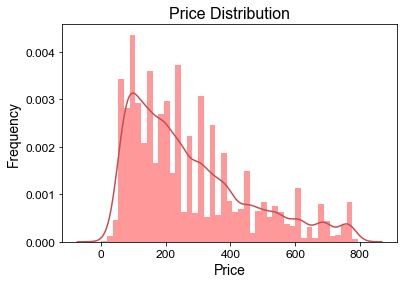

In [36]:
#Distribution plot


sns.distplot(df['price'], color = 'r')
sns.set(rc={"figure.figsize": (12, 10)})
plt.title('Price Distribution', fontsize = 16)
plt.xlabel('Price', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21545 entries, 4826 to 43970934
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   neighbourhood                   21545 non-null  int64
 1   room_type                       21545 non-null  int64
 2   price                           21545 non-null  int64
 3   minimum_nights                  21545 non-null  int64
 4   number_of_reviews               21545 non-null  int64
 5   calculated_host_listings_count  21545 non-null  int64
 6   availability_365                21545 non-null  int64
 7   distance_from_the_center_km     21545 non-null  int64
dtypes: int64(8)
memory usage: 1.5 MB


In [38]:
from sklearn import preprocessing 
d = preprocessing.normalize(db)
dbc_ohe_norm = pd.DataFrame(d, columns = db.columns)

db.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,distance_from_the_center_km
id,,,,,,,,,,
4826,37,41.05650,29.05367,0,720.0,1,1,1,365,6.103
27271,12,41.03254,28.98153,0,233.0,30,13,1,289,0.608
28277,32,41.04471,28.98567,1,761.0,3,0,19,365,0.862
29241,12,41.04844,28.95254,2,343.0,3,0,1,364,3.077
30697,12,41.03350,28.97626,2,768.0,1,1,1,365,0.891


<AxesSubplot: >

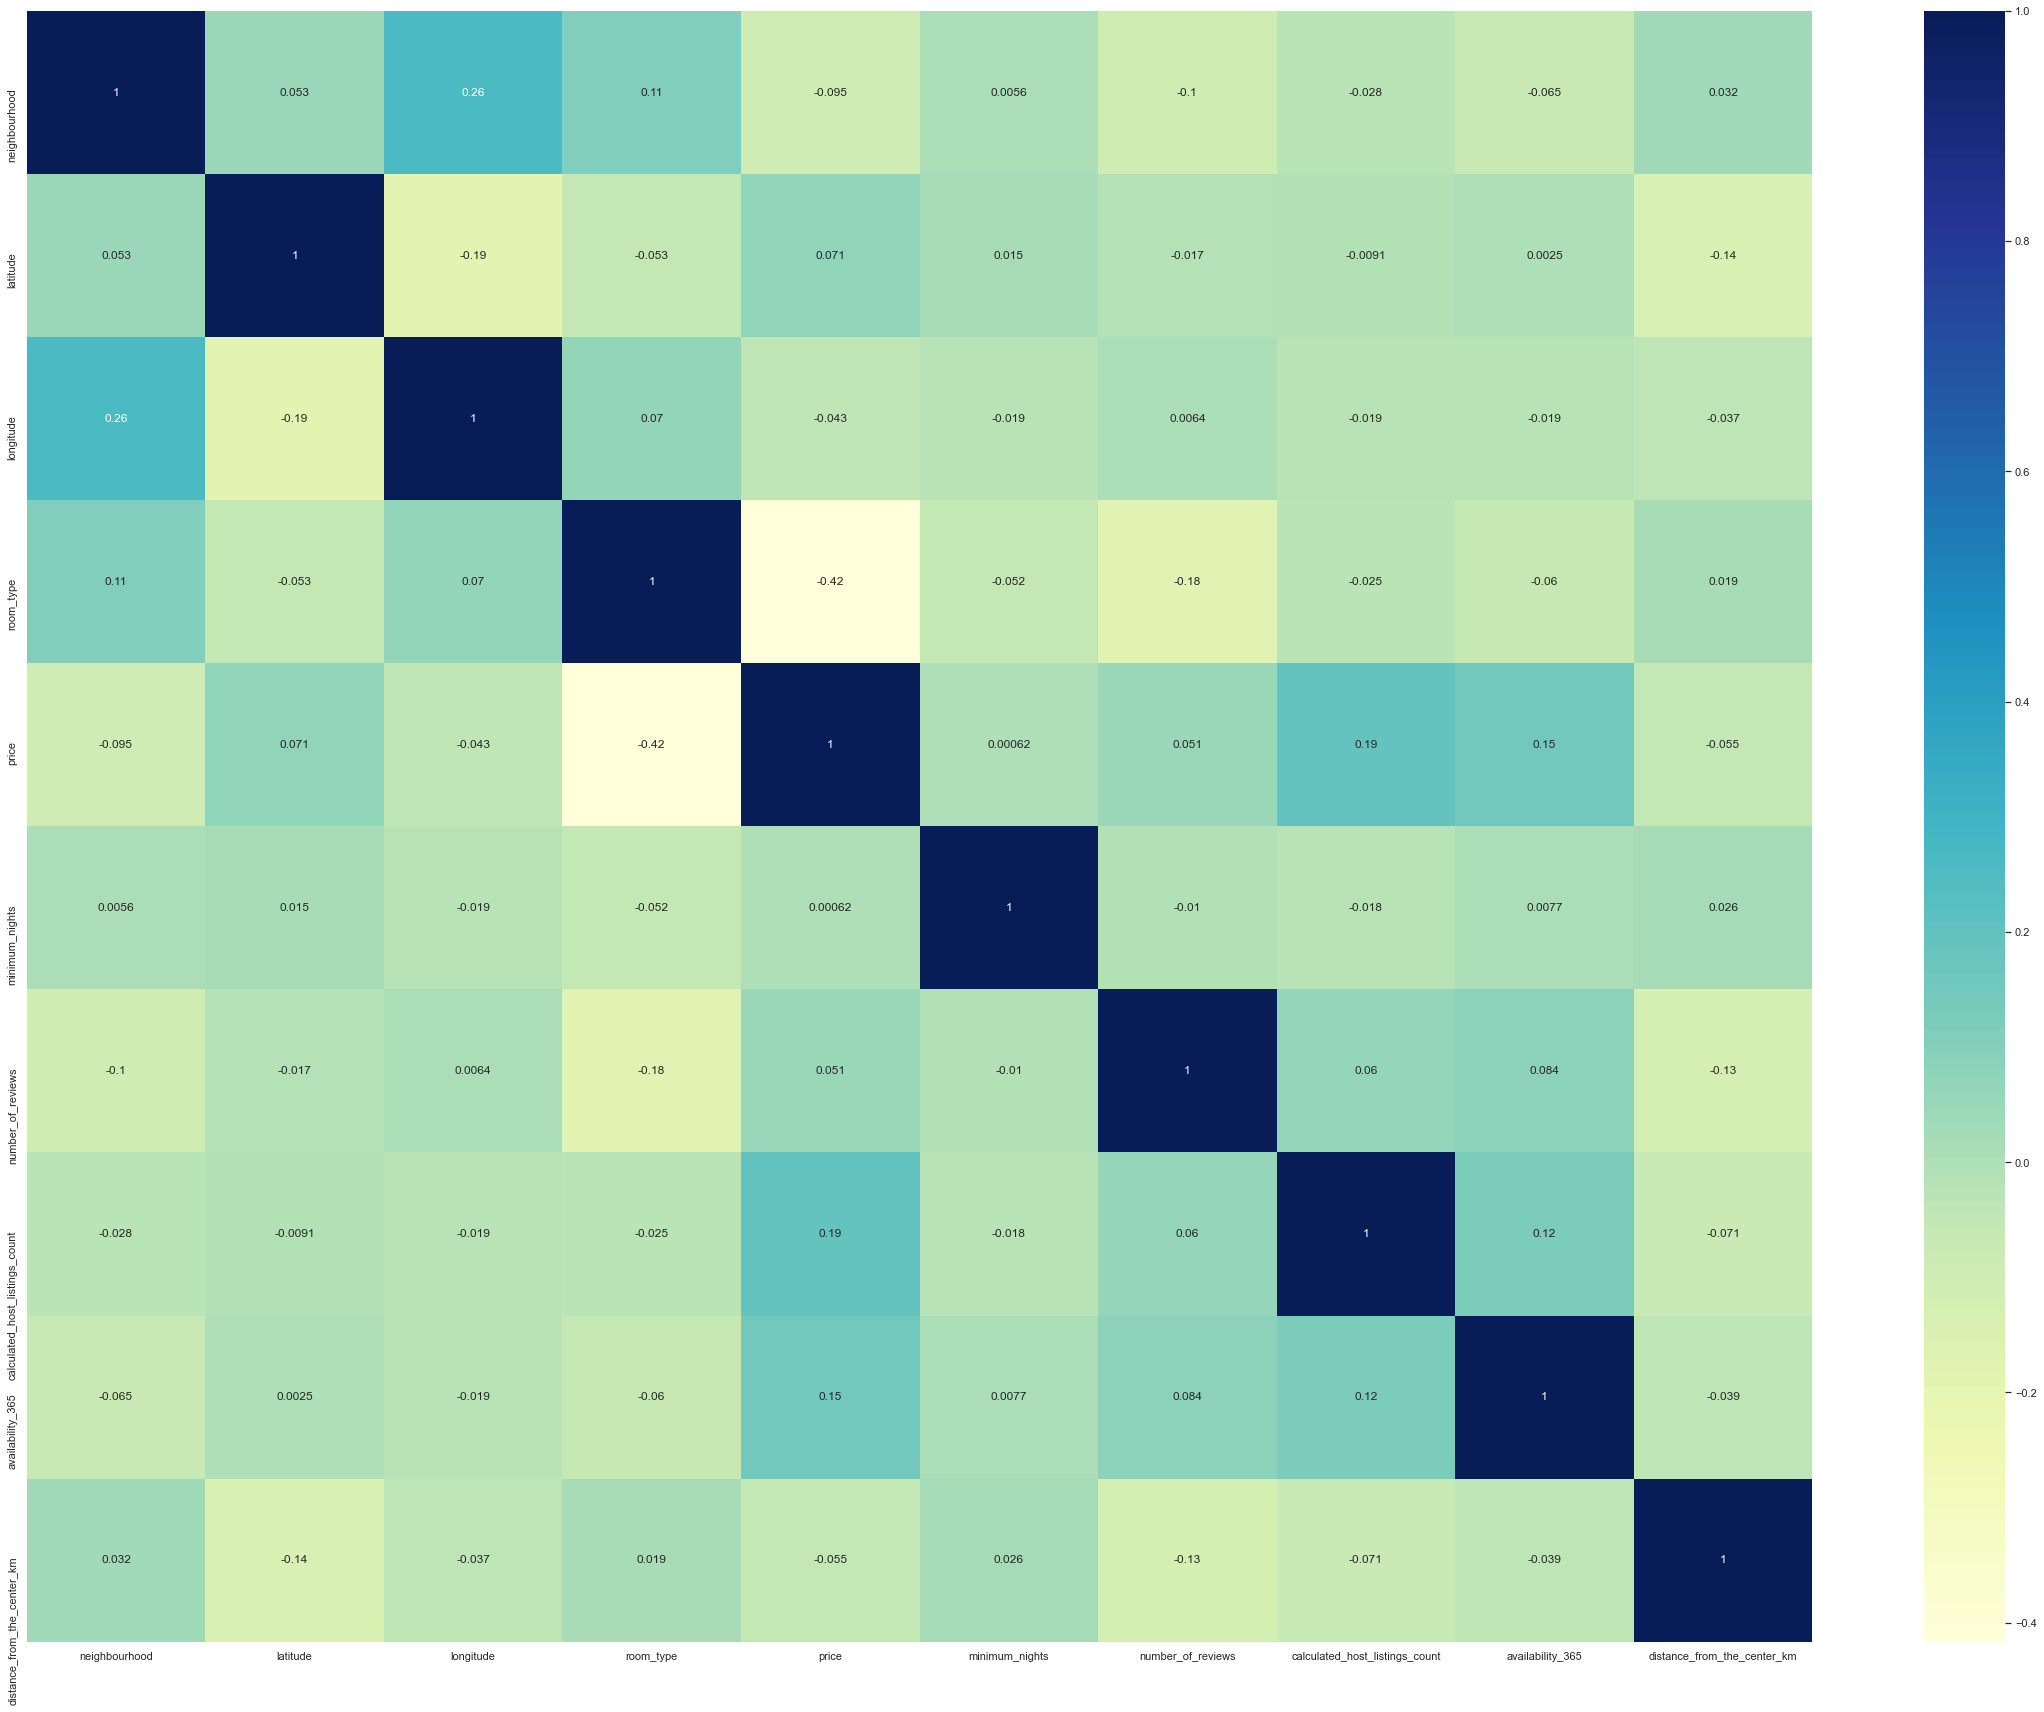

In [39]:
plt.figure(figsize = (40,30))
sns.heatmap(db.corr() , annot = True , cmap = "YlGnBu")

In [40]:
df.columns

Index(['neighbourhood', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'distance_from_the_center_km'],
      dtype='object')

In [41]:
from sklearn.model_selection import train_test_split

x= df.drop(['price'] , axis = 1).values
y= df['price'].values

x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.2 , random_state= 0)

In [42]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_sc = ss.fit_transform(x)

In [43]:
# from sklearn.ensemble import RandomForestRegressor
# random_forest=RandomForestRegressor()
# random_forest.fit(x_train , y_train)
# print("Random Forest Training Accuracy:", random_forest.score(x_train , y_train))
# print("Random Forest Testing Accuracy:", random_forest.score(x_test , y_test))

In [44]:
# reg=LinearRegression()
# reg.fit(x_train,y_train)
# y_pred=reg.predict(x_test)
# from sklearn.metrics import r2_score
# r2_score(y_test,y_pred)

In [45]:
# # MODELING

# # 1. OLS

# ols = LinearRegression()
# ols.fit(x_train, y_train)
# ols_yhat = ols.predict(x_test)

# # 2. Ridge

# ridge = Ridge(alpha = 0.5)
# ridge.fit(x_train, y_train)
# ridge_yhat = ridge.predict(x_test)

# # 3. Lasso

# lasso = Lasso(alpha = 0.01)
# lasso.fit(x_train, y_train)
# lasso_yhat = lasso.predict(x_test)

# # 4. Bayesian

# bayesian = BayesianRidge()
# bayesian.fit(x_train, y_train)
# bayesian_yhat = bayesian.predict(x_test)

In [46]:
# print('EXPLAINED VARIANCE SCORE:')
# print('-------------------------------------------------------------------------------')
# print(f'Explained Variance Score of OLS model is {evs(y_test, ols_yhat)}')
# print('-------------------------------------------------------------------------------')
# print(f'Explained Variance Score of Ridge model is {evs(y_test, ridge_yhat)}')
# print('-------------------------------------------------------------------------------')
# print(f'Explained Variance Score of Lasso model is {evs(y_test, lasso_yhat)}')
# print('-------------------------------------------------------------------------------')
# print(f'Explained Variance Score of Bayesian model is {evs(y_test, bayesian_yhat)}')
# print('-------------------------------------------------------------------------------')

In [47]:
# print(r2_score(y_test,ols_yhat))
# print('-------------')
# print(r2_score(y_test,ridge_yhat))
# print(r2_score(y_test,lasso_yhat))
# print(r2_score(y_test,bayesian_yhat))

In [48]:
regressors = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    BayesianRidge(),
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor()
]

In [49]:
from time import time
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

head = 10
for model in regressors[:head]:
    start = time()
    model.fit(x_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(x_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

LinearRegression()
	Training time: 0.007s
	Prediction time: 0.000s
	Explained variance: 0.219756790427185
	Mean absolute error: 122.47053141449896
	R2 score: 0.21953576472525593

Ridge()
	Training time: 0.003s
	Prediction time: 0.000s
	Explained variance: 0.21975664233032932
	Mean absolute error: 122.47083651991939
	R2 score: 0.21953562715580988

Lasso()
	Training time: 0.003s
	Prediction time: 0.000s
	Explained variance: 0.21965058608777444
	Mean absolute error: 122.55855433743804
	R2 score: 0.21943227731506176

BayesianRidge()
	Training time: 0.007s
	Prediction time: 0.000s
	Explained variance: 0.21975115076077123
	Mean absolute error: 122.4809855496455
	R2 score: 0.2195304834900278

KNeighborsRegressor()
	Training time: 0.010s
	Prediction time: 0.114s
	Explained variance: 0.14215490607668968
	Mean absolute error: 126.27774425620795
	R2 score: 0.14204628589352808

GradientBoostingRegressor()
	Training time: 0.628s
	Prediction time: 0.013s
	Explained variance: 0.3034906443693567
	Mean